In [31]:
import glob
import re
import seaborn as sns
import pandas as pd

In [47]:
files = glob.glob('*.txt')

nameHdf = 'Target Name'
raHdr = 'Right Ascension in degrees'
decHdr = 'Declination in degrees'
header = ','.join([nameHdf, raHdr, decHdr]) + '\n'
make_row = lambda inst, line: inst + ',' + re.sub(' +', ',', line.rstrip().lstrip()) + '\n'

make_pd_row = lambda inst, line: {nameHdf: inst, 
                                  raHdr: re.sub(' +', ',', line.rstrip().lstrip()).split(',')[0],
                                  decHdr: re.sub(' +', ',', line.rstrip().lstrip()).split(',')[1]}
rows = []
with open('all.csv', 'w') as outfile:
    outfile.write(header)
    for fileName in files:
        inst = fileName.split('_')[0].upper()
        with open(fileName) as fl:
            for idx, line in enumerate(fl):
                if '|' in line or '\\' in line:
                    continue
                #tgtName = inst + '_' + str(idx-start-1)
                if 'null' in line:
                    continue
                row = make_row(inst, line)
                pdRow = make_pd_row(inst, line)
                rows.append(pdRow)
                outfile.write(row)
df = pd.DataFrame(rows)

In [48]:
df[raHdr] = df[raHdr].astype(float)
df[decHdr] = df[decHdr].astype(float)
df.shape

(1968776, 3)

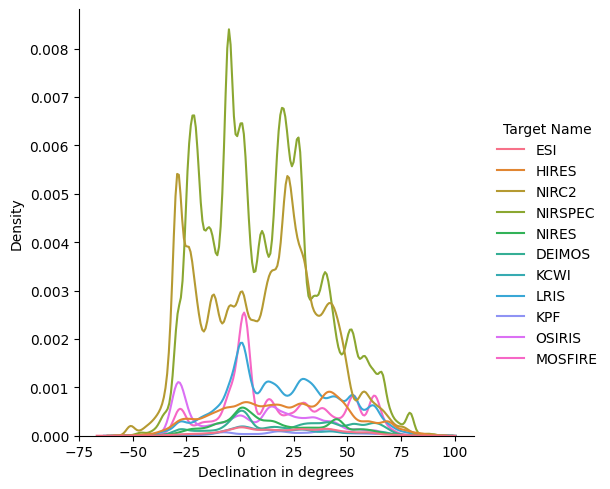

In [50]:
sns.displot(df, x=decHdr, kind="kde", hue=nameHdf)

In [55]:
dfunique = df.round(5).drop_duplicates()
dfunique.info

<bound method DataFrame.info of         Target Name  Right Ascension in degrees  Declination in degrees
0               ESI                   283.02754                -9.08269
1               ESI                   283.08654                -8.03139
4               ESI                   329.89629                -8.27058
5               ESI                   330.03571                -8.17986
6               ESI                   329.91679               -10.28358
...             ...                         ...                     ...
1968753     MOSFIRE                   266.53464                65.49372
1968754     MOSFIRE                   266.52794                65.49372
1968756     MOSFIRE                   266.52435                65.49349
1968759     MOSFIRE                   273.34931                65.29838
1968767     MOSFIRE                   272.41809                66.10787

[552220 rows x 3 columns]>

In [56]:
dfunique.to_csv('rounded_targets.csv', index=False)